<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup" data-toc-modified-id="Setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup</a></span><ul class="toc-item"><li><span><a href="#QC-Thresholds" data-toc-modified-id="QC-Thresholds-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>QC Thresholds</a></span></li><li><span><a href="#Inputs" data-toc-modified-id="Inputs-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Inputs</a></span></li></ul></li><li><span><a href="#Check-statistics" data-toc-modified-id="Check-statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Check statistics</a></span></li><li><span><a href="#Correlations-between-replicates" data-toc-modified-id="Correlations-between-replicates-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlations between replicates</a></span><ul class="toc-item"><li><span><a href="#Compute-Pearson-R-Score" data-toc-modified-id="Compute-Pearson-R-Score-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Compute Pearson R Score</a></span></li></ul></li></ul></div>

In [8]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
plt.rcParams['svg.fonttype'] = 'none'

In [10]:
sns.set_style('ticks')

# Setup

## QC Thresholds

In [11]:
min_mrna_reads = 5e5 # Minimum number of reads mapped to mRNA

## Inputs

In [12]:
data_dir = path.join('../new_runs/precise1k36')
os.listdir(data_dir)

['.DS_Store',
 'sample_table.csv',
 'iModulon_table.csv',
 'log_tpm_norm.csv',
 'log_tpm.csv',
 'X.csv',
 '375']

In [6]:
## Load expression data

In [13]:
DF_log_tpm = pd.read_csv(path.join(data_dir,'log_tpm.csv'),index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])

Number of genes: 4257
Number of samples: 1071


In [14]:
DF_log_tpm.head()

,p1k_00001,p1k_00002,p1k_00003,p1k_00004,p1k_00005,p1k_00006,p1k_00007,p1k_00008,p1k_00009,p1k_00010,...,p1k_01082,p1k_01083,p1k_01084,p1k_01085,p1k_01086,p1k_01087,p1k_01088,p1k_01089,p1k_01090,p1k_01091
b0002,10.260569,10.368555,11.193605,11.404163,10.497016,10.235690,9.477470,9.811860,10.735874,10.726916,...,6.180388,7.081743,7.459751,6.342581,6.828999,6.978036,6.768885,6.555132,7.026085,3.682998
b0003,9.920277,10.044224,11.045580,11.460140,10.374823,10.216922,9.219235,9.861262,10.528432,10.503092,...,5.694047,5.644681,5.381977,5.417139,5.732091,5.735584,5.330726,5.481251,5.935115,5.254793
b0004,9.936694,10.010638,9.976798,10.330368,9.876910,9.638754,8.258753,8.650959,9.739519,9.722997,...,5.912611,5.511218,5.653358,5.543221,5.969580,5.734591,5.885863,5.906892,6.011797,5.599206
b0005,7.027515,7.237449,6.014337,5.854519,6.950936,6.768425,5.011006,5.137711,6.745798,6.497823,...,2.924193,3.196556,3.521879,3.088028,3.648202,3.571539,3.730641,3.811311,4.698837,3.963494
b0006,6.537183,6.452699,6.371349,6.387164,6.321764,6.405053,6.286808,6.491897,6.460234,6.467135,...,5.180626,5.282073,5.224342,4.907761,5.383703,5.448308,5.045615,5.191275,5.373384,4.664055


# Check statistics

In [17]:
DF_metadata=pd.read_csv(path.join(data_dir,'sample_table.csv'), index_col=0)

In [33]:
DF_metadata = DF_metadata[DF_metadata.project =='stationary']

In [34]:
DF_metadata.head()

,sample_id,study,project,condition,rep_id,Strain Description,Strain,Culture Type,Evolved Sample,Base Media,...,contact,creator,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates,run_date
p1k_01056,GlcM9_1_3h__1,Stationary_phase,stationary,GlcM9_1_3h,1,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,...,Hyungyu Lim,Hyungyu Lim,True,True,True,True,stationary:GlcM9_1_3h,True,True,2/10/22
p1k_01057,GlcM9_1_3h__2,Stationary_phase,stationary,GlcM9_1_3h,2,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,...,Hyungyu Lim,Hyungyu Lim,True,True,True,True,stationary:GlcM9_1_3h,True,True,2/10/22
p1k_01058,GlcM9_2_4h__1,Stationary_phase,stationary,GlcM9_2_4h,1,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,...,Hyungyu Lim,Hyungyu Lim,True,True,True,True,stationary:GlcM9_2_4h,True,True,2/10/22
p1k_01059,GlcM9_2_4h__2,Stationary_phase,stationary,GlcM9_2_4h,2,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,...,Hyungyu Lim,Hyungyu Lim,True,True,True,True,stationary:GlcM9_2_4h,True,True,2/10/22
p1k_01060,GlcM9_3_6h__1,Stationary_phase,stationary,GlcM9_3_6h,1,Escherichia coli K-12 MG1655,MG1655,Batch,NaN,NaN,...,Hyungyu Lim,Hyungyu Lim,True,False,True,True,stationary:GlcM9_3_6h,True,True,2/10/22


# Correlations between replicates

<font size=4> First, get a full sample name </font>

In [35]:
# Turn off pesky warning
pd.set_option('mode.chained_assignment', None)

In [36]:
DF_metadata['full_name'] = DF_metadata.loc[:,'project'].str.cat(DF_metadata.loc[:,'condition'],sep=':')

In [37]:
DF_metadata_passed=DF_metadata

## Compute Pearson R Score

We required biological replicates to have a Pearson R correlation above 0.95. For samples with more than 2 replicates, the replicates must have R >= 0.95 with at least one other replicate or it was dropped. </font>

In [38]:
from tqdm.notebook import tqdm
import itertools
from scipy import stats
import numpy as np

In [39]:
rep_corrs = {}
rand_corrs = {}

num_comparisons = len(DF_metadata_passed)*(len(DF_metadata_passed)-1)/2
for exp1,exp2 in tqdm(itertools.combinations(DF_metadata_passed.index,2),total=num_comparisons):
    if DF_metadata_passed.loc[exp1,'full_name'] == DF_metadata_passed.loc[exp2,'full_name']:
        rep_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]
    else:
        rand_corrs[(exp1,exp2)] = stats.pearsonr(DF_log_tpm[exp1],DF_log_tpm[exp2])[0]

  0%|          | 0/630.0 [00:00<?, ?it/s]

In [40]:
rand_corrs

{('p1k_01056', 'p1k_01058'): 0.9652740696334915,
 ('p1k_01056', 'p1k_01059'): 0.9594405685507972,
 ('p1k_01056', 'p1k_01060'): 0.7238539297368031,
 ('p1k_01056', 'p1k_01061'): 0.7082610167512915,
 ('p1k_01056', 'p1k_01062'): 0.6650891087107152,
 ('p1k_01056', 'p1k_01063'): 0.7602023739519084,
 ('p1k_01056', 'p1k_01064'): 0.8226309789739704,
 ('p1k_01056', 'p1k_01065'): 0.7919660384448934,
 ('p1k_01056', 'p1k_01066'): 0.8442762612947052,
 ('p1k_01056', 'p1k_01067'): 0.8140388983274917,
 ('p1k_01056', 'p1k_01068'): 0.9775299588625812,
 ('p1k_01056', 'p1k_01069'): 0.9825018518560806,
 ('p1k_01056', 'p1k_01070'): 0.8339796790002864,
 ('p1k_01056', 'p1k_01071'): 0.8446476310434936,
 ('p1k_01056', 'p1k_01072'): 0.8419400128232787,
 ('p1k_01056', 'p1k_01073'): 0.8430838352824608,
 ('p1k_01056', 'p1k_01074'): 0.8396484202136308,
 ('p1k_01056', 'p1k_01075'): 0.8362847323049318,
 ('p1k_01056', 'p1k_01076'): 0.8303197893471828,
 ('p1k_01056', 'p1k_01077'): 0.8215986403764644,
 ('p1k_01056', 'p1k_

In [41]:
rep_corrs

{('p1k_01056', 'p1k_01057'): 0.9856016752810818,
 ('p1k_01058', 'p1k_01059'): 0.9724287433821845,
 ('p1k_01060', 'p1k_01061'): 0.9635059390539967,
 ('p1k_01062', 'p1k_01063'): 0.9481932800034218,
 ('p1k_01064', 'p1k_01065'): 0.949331826066454,
 ('p1k_01066', 'p1k_01067'): 0.950097284973902,
 ('p1k_01068', 'p1k_01069'): 0.9914038216825365,
 ('p1k_01070', 'p1k_01071'): 0.9887619378921573,
 ('p1k_01072', 'p1k_01073'): 0.9887489493614682,
 ('p1k_01074', 'p1k_01075'): 0.9774481437918343,
 ('p1k_01076', 'p1k_01077'): 0.9753640419510551,
 ('p1k_01078', 'p1k_01079'): 0.92209024579744,
 ('p1k_01080', 'p1k_01081'): 0.8661760032323186,
 ('p1k_01082', 'p1k_01083'): 0.9567558644245289,
 ('p1k_01084', 'p1k_01085'): 0.9443594174164639,
 ('p1k_01086', 'p1k_01087'): 0.9845773702043856,
 ('p1k_01088', 'p1k_01089'): 0.9818052324889686,
 ('p1k_01090', 'p1k_01091'): 0.8901231048079161}

In [42]:
sns.set_style('ticks')

Median Pearson R between replicates: 0.97


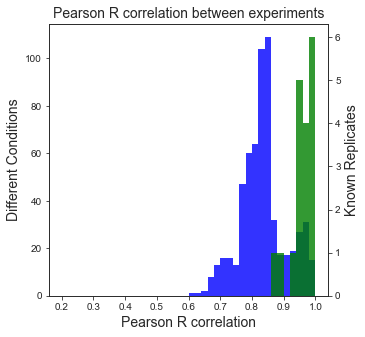

In [43]:
fig,ax = plt.subplots(figsize=(5,5))
ax2 = ax.twinx()
ax2.hist(rep_corrs.values(),bins=40,range=(0.2,1),alpha=0.8,color='green',linewidth=0)
ax.hist(rand_corrs.values(),bins=40,range=(0.2,1),alpha=0.8,color='blue',linewidth=0)
ax.set_title('Pearson R correlation between experiments',fontsize=14)
ax.set_xlabel('Pearson R correlation',fontsize=14)
ax.set_ylabel('Different Conditions',fontsize=14)
ax2.set_ylabel('Known Replicates',fontsize=14)

med_corr = np.median([v for k,v in rep_corrs.items()])
print('Median Pearson R between replicates: {:.2f}'.format(med_corr))

In [45]:
fig.get_figure().savefig("../images/Figure_S2/FigS2A_Pearson_corr.svg")

In [46]:
#pearson r cutoff for replicates
rcutoff = 0.85

#for each sample get max correlation between replicates
dissimilar = []
for idx, grp in DF_metadata_passed.groupby('full_name'):
    ident = np.identity(len(grp))
    corrs = (DF_log_tpm[grp.index].corr() - ident).max()
    dissimilar.extend(corrs[corrs<rcutoff].index)
DF_metadata['passed_replicate_corr'] = ~DF_metadata.index.isin(dissimilar)
DF_metadata_passed['passed_similar_replicates'] = ~DF_metadata_passed.index.isin(dissimilar)

In [47]:
len(dissimilar)

0